# **Import библиотек**

In [ ]:
from tensorflow.keras.models import Sequential #Сеть прямого распространения
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.utils import plot_model
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков

import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
from google.colab import drive
from google.colab import files #Для загрузки своей картинки
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cars_path = '/content/drive/MyDrive/Bases/IRZ_small/' #Папка картинок c тестовыми данными
batch_size = 12 #Размер выборки
img_width  = 120
img_height = 64

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Отключаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    cars_path, #Путь к папке с тестовыми данными
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

Found 6766 images belonging to 3 classes.


In [ ]:
# проверочная выборка
validation_generator = datagen.flow_from_directory(
    cars_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по типам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 1691 images belonging to 3 classes.


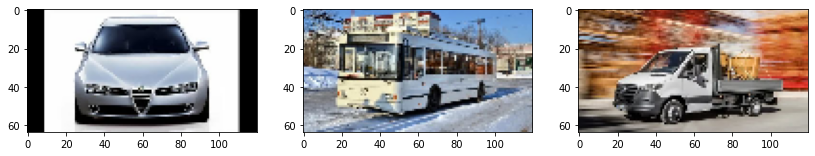

In [ ]:
# Взглянем на картинки
fig, axs = plt.subplots(1, 3, figsize=(14, 8)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  single_car_path = cars_path + '/' + os.listdir(cars_path)[i] + '/'#Формируем путь к выборке
  img_path = single_car_path + random.choice(os.listdir(single_car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии
plt.show() #Показываем изображения

# Создание и обучение 1 модели

In [ ]:
def createModel(): 
  model = Sequential()
  
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2))) # 240x128

  #model.add(Dropout(0.2))
  
  #model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
  #model.add(MaxPooling2D(pool_size=(3, 3))) # 120x64
  
  model.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3))) # 60x32

  model.add(Dropout(0.2))
  
  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))  # 30x16
  
  #model.add(Conv2D(2048, (3, 3), padding='same', activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))  # 15x8
  
  #model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(len(train_generator.class_indices), activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
  return model # Возвращаем созданную сеть

def PrintRes():
  #Оображаем график точности обучения
  plt.figure(figsize=(18,10))
  plt.plot(history.history['accuracy'], 
  label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
  label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()  
  return

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 64, 256)      7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 32, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 32, 512)       524800    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 10, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 10, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 10, 1024)      4719616   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 5, 1024)       0

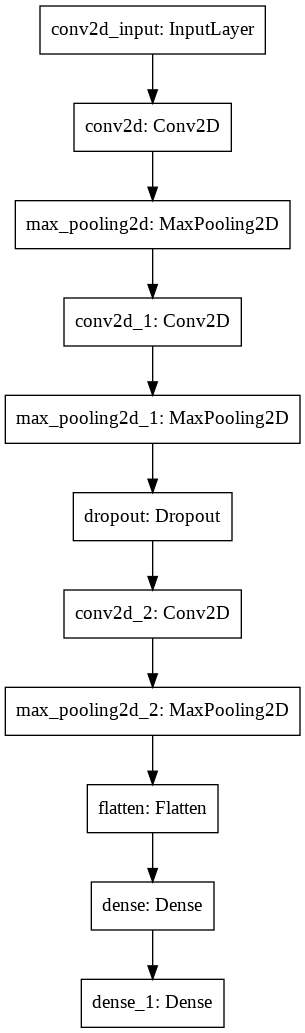

In [ ]:
model = createModel()
model.summary()
plot_model(model, to_file='/content/drive/MyDrive/Models/model.png')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
676/676 [==============================] - 3240s 5s/step - loss: 0.9925 - accuracy: 0.4815 - val_loss: 0.5866 - val_accuracy: 0.7657
Epoch 2/40
676/676 [==============================] - 54s 80ms/step - loss: 0.5908 - accuracy: 0.7725 - val_loss: 0.5182 - val_accuracy: 0.7817
Epoch 3/40
676/676 [==============================] - 53s 79ms/step - loss: 0.4576 - accuracy: 0.8197 - val_loss: 0.3591 - val_accuracy: 0.8698
Epoch 4/40
676/676 [==============================] - 53s 78ms/step - loss: 0.3698 - accuracy: 0.8542 - val_loss: 0.3057 - val_accuracy: 0.8811
Epoch 5/40
676/676 [==============================] - 53s 79ms/step - loss: 0.3238 - accuracy: 0.8752 - val_loss: 0.3206 - val_accuracy: 0.8722
Epoch 6/40
676/676 [==============================] - 53s 78ms/step - loss: 0.2921 - accuracy: 0.8921 - val_loss: 0.3074 - val_accuracy: 0.8846
Epoch 7/40
676/676 [==============================] - 53s 78ms/step - loss: 0.2793 - accuracy: 0.9015 - val_loss: 0.3214 - val_accuracy:

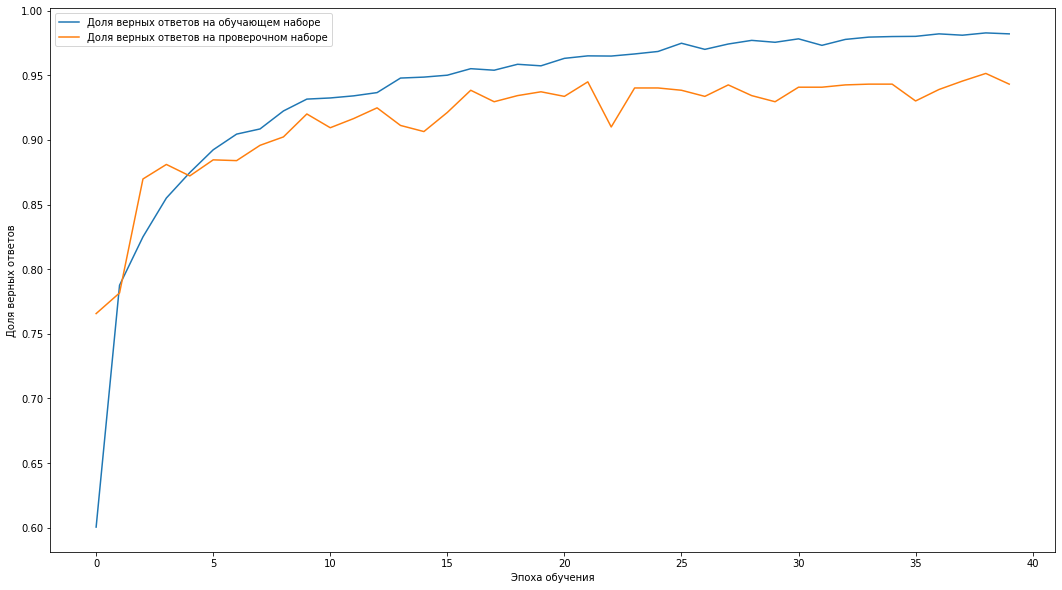

Наилучшая точность на тестовой выборке = 0.9514793157577515


In [ ]:
# run
epochs = 40 
history = model.fit_generator(
    train_generator, steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, validation_steps = validation_generator.samples // batch_size,
    epochs=epochs, verbose=1)
#Оображаем график точности обучения
PrintRes()
model.save( '/content/drive/MyDrive/Models/Diplom_small_img_40e.h5' )
print('Наилучшая точность на тестовой выборке =', max(history.history['val_accuracy']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
676/676 [==============================] - 2235s 3s/step - loss: 0.0442 - accuracy: 0.9853 - val_loss: 0.2129 - val_accuracy: 0.9361
Epoch 2/20
676/676 [==============================] - 39s 58ms/step - loss: 0.0441 - accuracy: 0.9849 - val_loss: 0.1621 - val_accuracy: 0.9556
Epoch 3/20
676/676 [==============================] - 40s 59ms/step - loss: 0.0459 - accuracy: 0.9839 - val_loss: 0.2370 - val_accuracy: 0.9296
Epoch 4/20
676/676 [==============================] - 40s 59ms/step - loss: 0.0434 - accuracy: 0.9858 - val_loss: 0.2039 - val_accuracy: 0.9438
Epoch 5/20
676/676 [==============================] - 40s 59ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.1749 - val_accuracy: 0.9509
Epoch 6/20
676/676 [==============================] - 40s 59ms/step - loss: 0.0456 - accuracy: 0.9837 - val_loss: 0.1825 - val_accuracy: 0.9467
Epoch 7/20
676/676 [==============================] - 40s 59ms/step - loss: 0.0416 - accuracy: 0.9862 - val_loss: 0.1600 - val_accuracy:

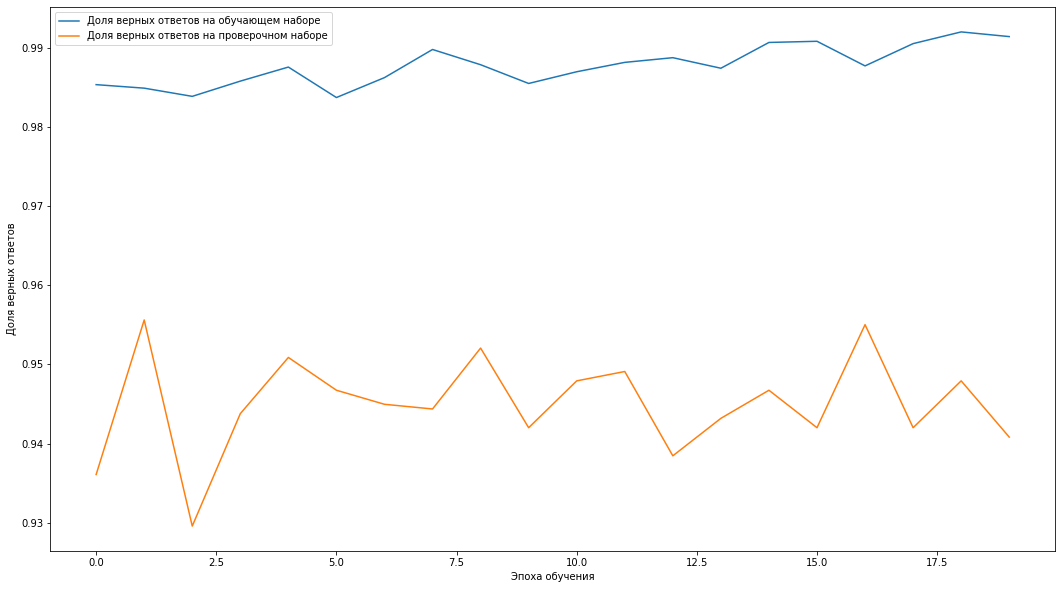

In [ ]:
epochs = 20 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Models/Diplom_small_img_40e.h5')
history = model.fit_generator(
    train_generator, steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, validation_steps = validation_generator.samples // batch_size,
    epochs=epochs, verbose=1)
#Оображаем график точности обучения
PrintRes()
model.save( '/content/drive/MyDrive/Models/Diplom_small_img_60e.h5' )

In [ ]:
model.save_weights('/content/drive/MyDrive/Models/Diplom_small_img_60_weights')

# Создание и обучение 2 модели

In [ ]:
def createModel2(): 
  model = Sequential()
  
  model.add(Conv2D(256, (4, 4), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2))) # 240x128

  #model.add(Dropout(0.2))
  
  #model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
  #model.add(MaxPooling2D(pool_size=(3, 3))) # 120x64
  
  model.add(Conv2D(512, (4, 4), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3))) # 60x32

  model.add(Dropout(0.2))
  
  model.add(Conv2D(1024, (4, 4), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))  # 30x16
  
  #model.add(Conv2D(2048, (3, 3), padding='same', activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))  # 15x8
  
  #model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(2048, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(len(train_generator.class_indices), activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00007), metrics=['accuracy'])
  return model # Возвращаем созданную сеть

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 120, 64, 256)      12544     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 32, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 32, 512)       2097664   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 10, 512)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 10, 512)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 10, 1024)      8389632   
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 5, 1024)      

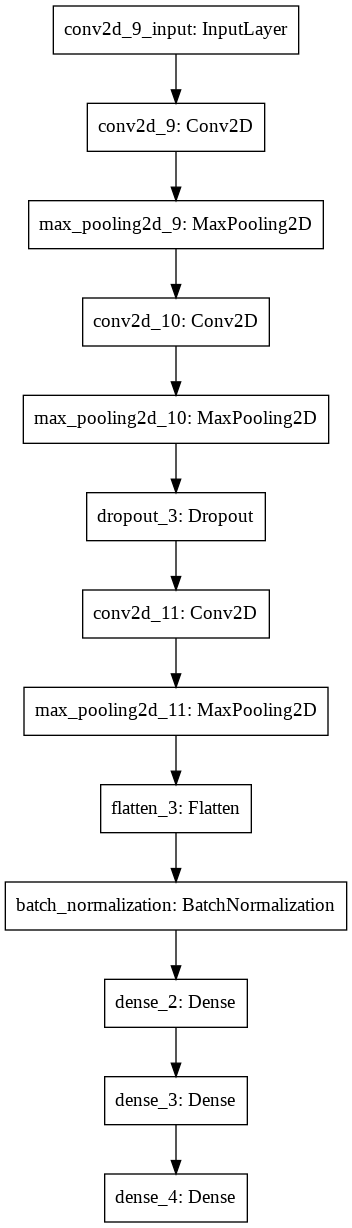

In [ ]:
model = createModel2()
model.summary()
plot_model(model, to_file='/content/drive/MyDrive/Models/model2.png')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
676/676 [==============================] - 61s 88ms/step - loss: 0.9617 - accuracy: 0.5703 - val_loss: 0.7912 - val_accuracy: 0.6178
Epoch 2/20
676/676 [==============================] - 59s 87ms/step - loss: 0.5254 - accuracy: 0.7876 - val_loss: 0.4661 - val_accuracy: 0.8178
Epoch 3/20
676/676 [==============================] - 59s 87ms/step - loss: 0.4031 - accuracy: 0.8460 - val_loss: 0.3694 - val_accuracy: 0.8562
Epoch 4/20
676/676 [==============================] - 59s 87ms/step - loss: 0.3341 - accuracy: 0.8756 - val_loss: 0.3006 - val_accuracy: 0.8799
Epoch 5/20
676/676 [==============================] - 59s 87ms/step - loss: 0.3034 - accuracy: 0.8884 - val_loss: 0.2579 - val_accuracy: 0.9006
Epoch 6/20
676/676 [==============================] - 59s 87ms/step - loss: 0.2632 - accuracy: 0.9019 - val_loss: 0.2189 - val_accuracy: 0.9178
Epoch 7/20
676/676 [==============================] - 59s 87ms/step - loss: 0.2280 - accuracy: 0.9142 - val_loss: 0.2568 - val_accuracy:

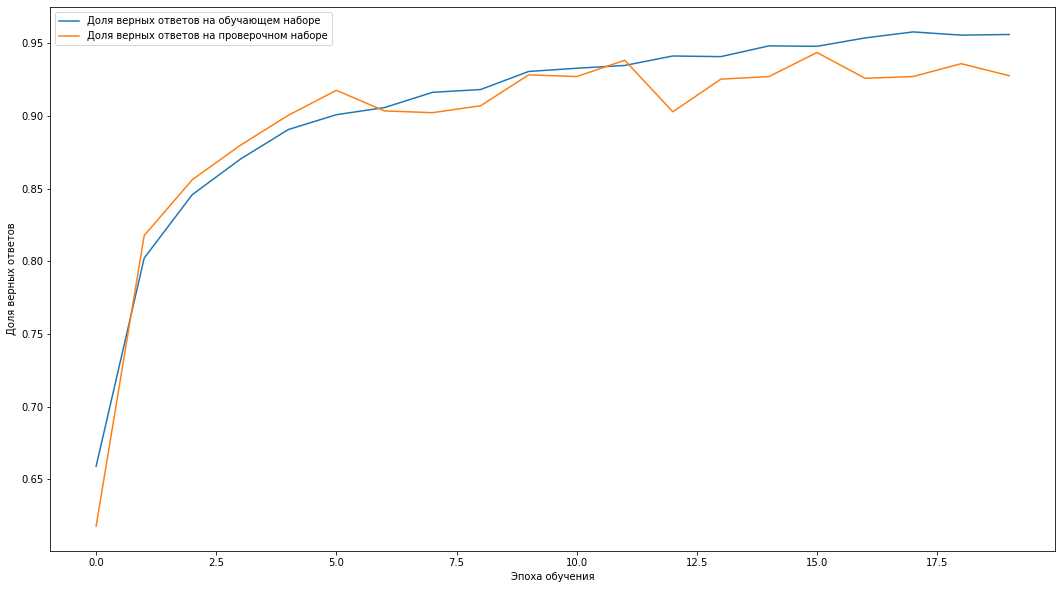

In [ ]:
epochs = 20 
#model.load_weights('/content/drive/MyDrive/Models/Diplom_small_img_60_weights')
history = model.fit_generator(
    train_generator, steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, validation_steps = validation_generator.samples // batch_size,
    epochs=epochs, verbose=1)
#Оображаем график точности обучения
PrintRes()
model.save( '/content/drive/MyDrive/Models/Diplom_small_img_80e.h5' )

In [ ]:
history = model.fit_generator(
    train_generator, steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, validation_steps = validation_generator.samples // batch_size,
    epochs=40, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
676/676 [==============================] - 59s 87ms/step - loss: 0.1165 - accuracy: 0.9591 - val_loss: 0.1768 - val_accuracy: 0.9367
Epoch 2/40
676/676 [==============================] - 59s 87ms/step - loss: 0.1048 - accuracy: 0.9639 - val_loss: 0.2527 - val_accuracy: 0.9189
Epoch 3/40
676/676 [==============================] - 59s 87ms/step - loss: 0.1042 - accuracy: 0.9623 - val_loss: 0.2031 - val_accuracy: 0.9302
Epoch 4/40
676/676 [==============================] - 59s 87ms/step - loss: 0.0932 - accuracy: 0.9664 - val_loss: 0.1847 - val_accuracy: 0.9438
Epoch 5/40
676/676 [==============================] - 59s 87ms/step - loss: 0.0940 - accuracy: 0.9664 - val_loss: 0.1623 - val_accuracy: 0.9438
Epoch 6/40
676/676 [==============================] - 59s 87ms/step - loss: 0.0954 - accuracy: 0.9668 - val_loss: 0.1974 - val_accuracy: 0.9379
Epoch 7/40
676/676 [==============================] - 59s 87ms/step - loss: 0.0905 - accuracy: 0.9719 - val_loss: 0.1924 - val_accuracy:

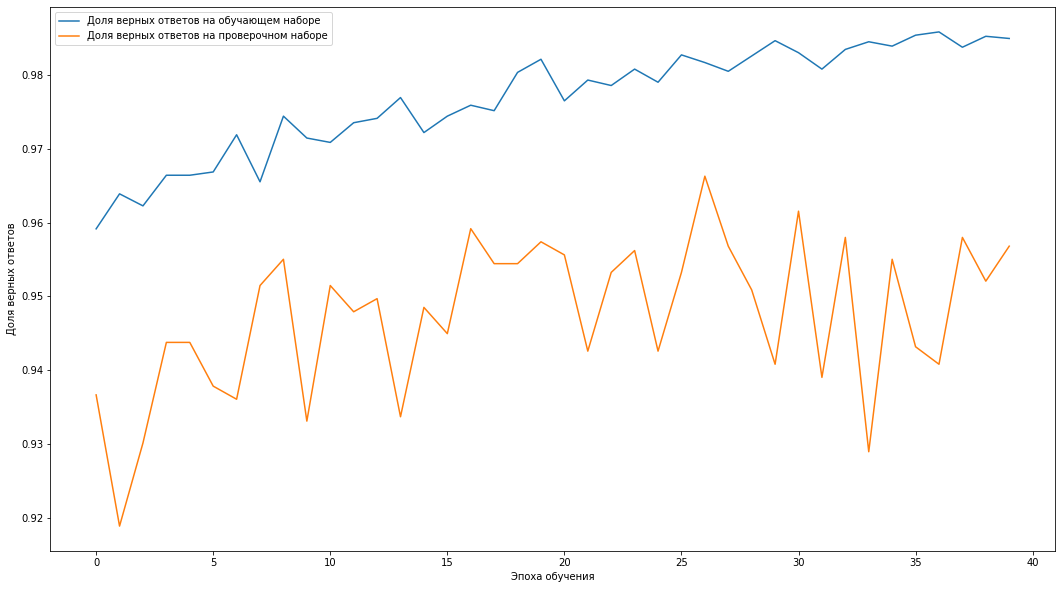

In [ ]:
PrintRes()
model.save_weights('/content/drive/MyDrive/Models/Diplom_small_img_120_weights.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
676/676 [==============================] - 62s 91ms/step - loss: 0.0388 - accuracy: 0.9866 - val_loss: 0.1517 - val_accuracy: 0.9562
Epoch 2/40
676/676 [==============================] - 61s 90ms/step - loss: 0.0332 - accuracy: 0.9884 - val_loss: 0.1470 - val_accuracy: 0.9598
Epoch 3/40
676/676 [==============================] - 61s 90ms/step - loss: 0.0325 - accuracy: 0.9884 - val_loss: 0.1601 - val_accuracy: 0.9574
Epoch 4/40
676/676 [==============================] - 61s 90ms/step - loss: 0.0348 - accuracy: 0.9873 - val_loss: 0.1464 - val_accuracy: 0.9604
Epoch 5/40
676/676 [==============================] - 61s 90ms/step - loss: 0.0330 - accuracy: 0.9880 - val_loss: 0.1394 - val_accuracy: 0.9615
Epoch 6/40
676/676 [==============================] - 61s 90ms/step - loss: 0.0364 - accuracy: 0.9865 - val_loss: 0.1538 - val_accuracy: 0.9568
Epoch 7/40
676/676 [==============================] - 61s 90ms/step - loss: 0.0326 - accuracy: 0.9878 - val_loss: 0.1560 - val_accuracy:

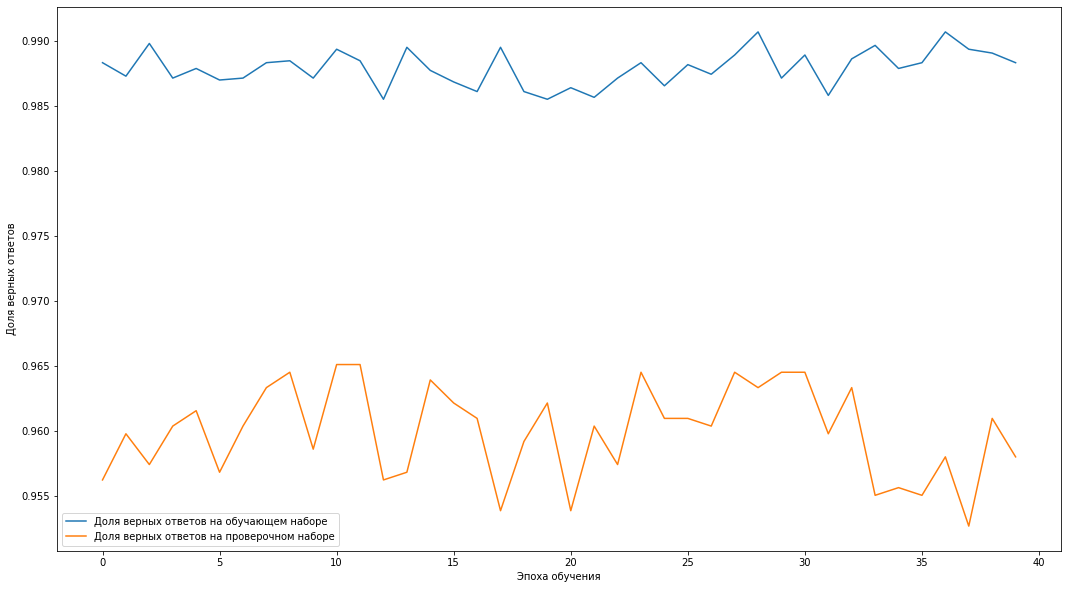

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.00005), metrics=['accuracy']) #Adam
history = model.fit_generator(
    train_generator, steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, validation_steps = validation_generator.samples // batch_size,
    epochs=40, verbose=1)
PrintRes()
model.save_weights('/content/drive/MyDrive/Models/Diplom_small_img_160_weights.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
676/676 [==============================] - 63s 92ms/step - loss: 0.0363 - accuracy: 0.9869 - val_loss: 0.1330 - val_accuracy: 0.9609
Epoch 2/10
676/676 [==============================] - 63s 93ms/step - loss: 0.0287 - accuracy: 0.9899 - val_loss: 0.1365 - val_accuracy: 0.9604
Epoch 3/10
676/676 [==============================] - 62s 92ms/step - loss: 0.0353 - accuracy: 0.9870 - val_loss: 0.1380 - val_accuracy: 0.9609
Epoch 4/10
676/676 [==============================] - 62s 92ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.1331 - val_accuracy: 0.9615
Epoch 5/10
676/676 [==============================] - 62s 91ms/step - loss: 0.0271 - accuracy: 0.9904 - val_loss: 0.1524 - val_accuracy: 0.9598
Epoch 6/10
676/676 [==============================] - 62s 92ms/step - loss: 0.0323 - accuracy: 0.9886 - val_loss: 0.1211 - val_accuracy: 0.9680
Epoch 7/10
676/676 [==============================] - 61s 91ms/step - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.1480 - val_accuracy:

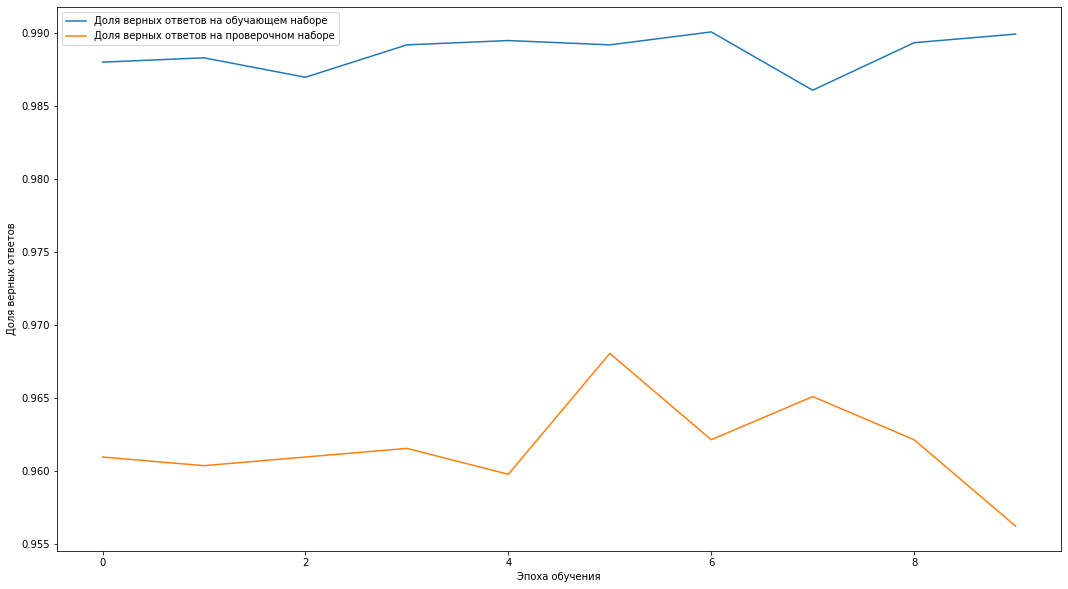

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.00001), metrics=['accuracy']) #Adam
history = model.fit_generator(
    train_generator, steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, validation_steps = validation_generator.samples // batch_size,
    epochs=10, verbose=1)
#PrintRes()
model.save_weights('/content/drive/MyDrive/Models/Diplom_small_img_170_weights.h5')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.00001), metrics=['accuracy']) # Adadelta
history = model.fit_generator(
    train_generator, steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, validation_steps = validation_generator.samples // batch_size,
    epochs=30, verbose=1)

model.save_weights('/content/drive/MyDrive/Models/Diplom_small_img_200_weights.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
676/676 [==============================] - 60s 88ms/step - loss: 0.0265 - accuracy: 0.9906 - val_loss: 0.1158 - val_accuracy: 0.9675
Epoch 2/30
676/676 [==============================] - 59s 88ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.1456 - val_accuracy: 0.9651
Epoch 3/30
676/676 [==============================] - 59s 88ms/step - loss: 0.0209 - accuracy: 0.9943 - val_loss: 0.1278 - val_accuracy: 0.9663
Epoch 4/30
676/676 [==============================] - 60s 89ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.1266 - val_accuracy: 0.9680
Epoch 5/30
676/676 [==============================] - 60s 89ms/step - loss: 0.0139 - accuracy: 0.9948 - val_loss: 0.1354 - val_accuracy: 0.9657
Epoch 6/30
676/676 [==============================] - 60s 89ms/step - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.1131 - val_accuracy: 0.9734
Epoch 7/30
676/676 [==============================] - 60s 89ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.1037 - val_accuracy:

веса Diplom_small_img_200_weights_97-16.h5

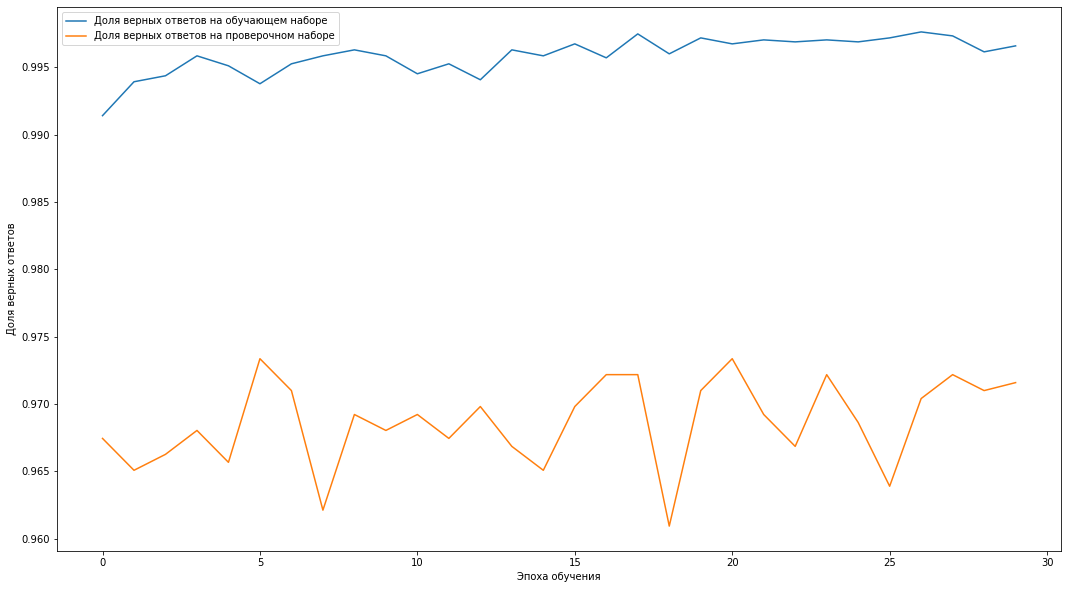

In [ ]:
PrintRes()